In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import numpy as np
from IPython.display import HTML, display
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

# For 3d plots. This import is necessary to have 3D plotting below
from mpl_toolkits.mplot3d import Axes3D

# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

C:\Users\Mumin\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [8]:
data = pd.read_csv("F:/Google Drive/UoD/Advanced Analytics/Data Sets/finaldata.csv")
clean_data = pd.read_csv("F:/Google Drive/UoD/Advanced Analytics/Data Sets/cleandata.csv")
test = pd.read_csv("F:/Google Drive/UoD/Advanced Analytics/Data Sets/dengue_features_test.csv")
data.isnull().sum()
test.isnull().sum()

year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                        2
station_diur_temp_rng_c                   2
station_max_temp_c                        2
station_min_temp_c                        2
station_precip_mm               

In [25]:
final_data = data.fillna(method = 'ffill')
test = test.fillna(method = 'ffill')
final_data.isnull().sum()

Unnamed: 0                               0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

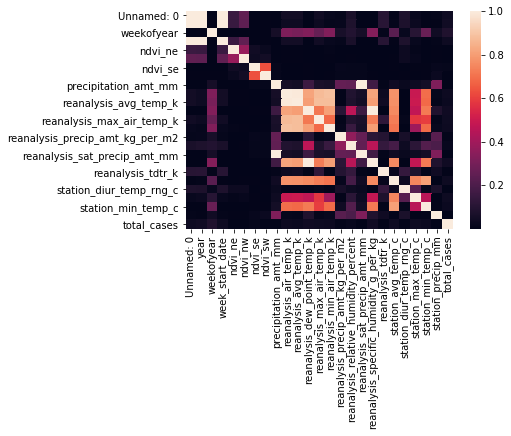

In [12]:
sns.heatmap(final_data.corr()**2)

In [18]:
print (final_data.dtypes)

Unnamed: 0                                 int64
year                                       int64
weekofyear                                 int64
week_start_date                            int64
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [8]:
print(data.shape)

(936, 25)


In [20]:
# import statsmodels.formula.api as smf
model = smf.ols("""total_cases ~ ndvi_ne + ndvi_nw + 
                      ndvi_se + ndvi_sw + precipitation_amt_mm + 
                     reanalysis_air_temp_k + reanalysis_avg_temp_k + 
                      reanalysis_dew_point_temp_k + reanalysis_max_air_temp_k + 
                     reanalysis_min_air_temp_k + reanalysis_precip_amt_kg_per_m2 + 
                      reanalysis_relative_humidity_percent + reanalysis_sat_precip_amt_mm + 
                     reanalysis_specific_humidity_g_per_kg + reanalysis_tdtr_k + 
                      station_avg_temp_c + station_diur_temp_rng_c + 
                      station_max_temp_c + station_min_temp_c + station_precip_mm""", data= final_data).fit()

# print the coefficients
model.params

# print a summary of the fitted model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_cases   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     8.280
Date:                Sun, 07 Jan 2018   Prob (F-statistic):           1.03e-21
Time:                        01:10:50   Log-Likelihood:                -4940.6
No. Observations:                 936   AIC:                             9921.
Df Residuals:                     916   BIC:                         1.002e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              3618.5342   6687.551      0.541      0.589   -9506.168    1.67e+04
ndvi_ne                                   4.5953     19.532      0.235      0.814     -33.738      42.928
ndvi_nw                                  27.0401     22.813      1.185      0.236     -17.732      71.813
ndvi_se                                -381.0170     47.332     -8.050      0.000    -473.908    -288.126
ndvi_sw                                 345.1254     48.529      7.112      0.000     249.884     440.367
precipitation_amt_mm                     -0.0437      0.024     -1.806      0.071      -0.091       0.004
reanalysis_air_temp_k                    62.9070     85.353      0.737      0.461    -104.603     230.417
reanalysis_avg_temp_k                   -58.5439     21.124     -2.771      0.006    -100.001     -17.087
reanalysis_dew_point_temp_k             -37.3585     79.426     -0.470      0.638    -193.236     118.519
reanalysis_max_air_temp_k                16.5757      5.112      3.243      0.001       6.544      26.608
reanalysis_min_air_temp_k                 2.1351      5.248      0.407      0.684      -8.165      12.435
reanalysis_precip_amt_kg_per_m2           0.0471      0.064      0.735      0.462      -0.079       0.173
reanalysis_relative_humidity_percent      2.4898     17.595      0.142      0.887     -32.041      37.020
reanalysis_sat_precip_amt_mm             -0.0437      0.024     -1.806      0.071      -0.091       0.004
reanalysis_specific_humidity_g_per_kg    27.9380     22.213      1.258      0.209     -15.657      71.533
reanalysis_tdtr_k                       -16.4526      5.580     -2.949      0.003     -27.403      -5.502
station_avg_temp_c                       -7.5185      5.356     -1.404      0.161     -18.030       2.992
station_diur_temp_rng_c                   3.7175      3.357      1.107      0.268      -2.870      10.305
station_max_temp_c                        1.5559      2.745      0.567      0.571      -3.831       6.943
station_min_temp_c                        1.4595      3.297      0.443      0.658      -5.010       7.929
station_precip_mm                        -0.0101      0.073     -0.138      0.890      -0.153       0.133
==============================================================================
Omnibus:                      746.913   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15226.786
Skew:                           3.575   Prob(JB):                         0.00
Kurtosis:                      21.420   Cond. No.                     1.08e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix 

In [53]:
import statsmodels.formula.api as smf
model2 = smf.ols("""total_cases ~ precipitation_amt_mm + reanalysis_avg_temp_k + 
    reanalysis_dew_point_temp_k + reanalysis_max_air_temp_k + 
    reanalysis_precip_amt_kg_per_m2 + reanalysis_specific_humidity_g_per_kg + 
    reanalysis_tdtr_k + station_diur_temp_rng_c + station_max_temp_c""", data= final_data).fit()

# print a summary of the fitted model
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_cases   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     8.756
Date:                Sun, 07 Jan 2018   Prob (F-statistic):           1.04e-12
Time:                        02:47:19   Log-Likelihood:                -4976.6
No. Observations:                 936   AIC:                             9973.
Df Residuals:                     926   BIC:                         1.002e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              9284.3600   5826.452      1.593      0.111   -2150.222    2.07e+04
precipitation_amt_mm                     -0.0734      0.045     -1.617      0.106      -0.163       0.016
reanalysis_avg_temp_k                   -10.5325      5.366     -1.963      0.050     -21.064      -0.001
reanalysis_dew_point_temp_k             -40.8821     20.083     -2.036      0.042     -80.296      -1.468
reanalysis_max_air_temp_k                17.4138      5.093      3.419      0.001       7.418      27.410
reanalysis_precip_amt_kg_per_m2           0.0623      0.063      0.995      0.320      -0.061       0.185
reanalysis_specific_humidity_g_per_kg    42.5101     20.757      2.048      0.041       1.775      83.246
reanalysis_tdtr_k                       -21.0138      4.845     -4.337      0.000     -30.522     -11.506
station_diur_temp_rng_c                   3.7315      2.859      1.305      0.192      -1.879       9.342
station_max_temp_c                        1.3572      2.028      0.669      0.503      -2.622       5.337
==============================================================================
Omnibus:                      868.576   Durbin-Watson:                   0.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26929.846
Skew:                           4.328   Prob(JB):                         0.00
Kurtosis:                      27.811   Cond. No.                     1.87e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
feature_cols = ['ndvi_ne', 'ndvi_nw', 
                      'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 
                     'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 
                      'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 
                      'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm']
x = final_data[feature_cols]
y = final_data.total_cases

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(x, y)

# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)

3618.53420296
[  4.59528632e+00   2.70400585e+01  -3.81017006e+02   3.45125407e+02
  -4.36624277e-02   6.29069912e+01  -5.85438527e+01  -3.73584686e+01
   1.65756578e+01   2.13511574e+00   4.70914143e-02   2.48981760e+00
  -4.36624277e-02   2.79380406e+01  -1.64526199e+01  -7.51852002e+00
   3.71753147e+00   1.55585192e+00   1.45950380e+00  -1.00942066e-02]


In [49]:
test_data = test[feature_cols]
predictions = lm.predict(test_data)
# RMSE
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(test['total_cases'], predictions)))


66.4059336089


In [1]:
## The line / model
import matplotlib.pyplot as plt
plt.scatter(test['total_cases'], predictions)

NameError: name 'test' is not defined

Text(0,0.5,'Number of Cases')

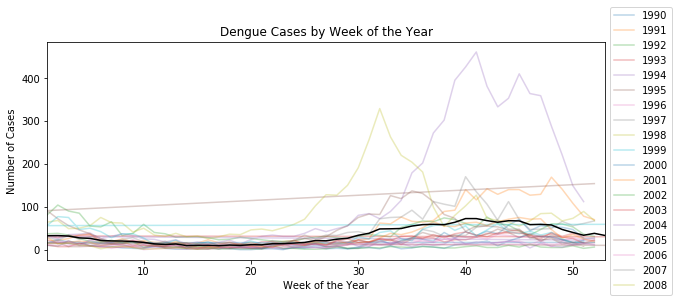

In [18]:

for i in set(data['year']):
    df = data[data['year'] == i]
    df.set_index('weekofyear', drop = True, inplace = True)
    plt.plot(df['total_cases'], alpha = .3)
    
data.groupby('weekofyear')['total_cases'].mean().plot(c = 'k', figsize = (10,4))
plt.legend(set(data['year']), loc='center left', bbox_to_anchor=(1, .5))

plt.title('Dengue Cases by Week of the Year')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Cases')